In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'DataSets\indexData.csv')
df2 = pd.read_csv(r'DataSets\prices.csv')

In [3]:
df.shape

(112457, 8)

In [4]:
df2.shape

(851264, 7)

In [45]:
df2['Daily Return'] = df2['close'] - df2['open']
df2

,date,symbol,open,close,low,high,volume,Daily Return
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0,2.409996
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0,-5.259995
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0,-1.430000
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0,1.140000
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0,-2.040001
...,...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0,-0.110001
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0,-0.029999
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0,-0.110000
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0,0.720001


In [4]:
df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


In [6]:
df2.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

Index        0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df.shape

(110253, 8)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110253 entries, 0 to 112456
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      110253 non-null  object 
 1   Date       110253 non-null  object 
 2   Open       110253 non-null  float64
 3   High       110253 non-null  float64
 4   Low        110253 non-null  float64
 5   Close      110253 non-null  float64
 6   Adj Close  110253 non-null  float64
 7   Volume     110253 non-null  float64
dtypes: float64(6), object(2)
memory usage: 7.6+ MB


In [10]:
df['Index'].value_counts()

Index
NYA          13947
N225         13874
IXIC         12690
GSPTSE       10526
HSI           8492
GDAXI         8438
SSMI          7671
KS11          6029
TWII          5869
000001.SS     5791
399001.SZ     5760
N100          5474
NSEI          3346
J203.JO       2346
Name: count, dtype: int64

In [75]:
df_nya = df[df['Index'] == 'NYA']
df_n225 = df[df['Index'] == 'N225']

In [42]:
df2['symbol'].value_counts()

symbol
KSU     1762
NOC     1762
ORCL    1762
OMC     1762
OKE     1762
        ... 
KHC      378
HPE      304
CSRA     284
WLTW     251
FTV      126
Name: count, Length: 501, dtype: int64

In [ ]:
df_n225

In [35]:
df_nya['Date'] = pd.to_datetime(df_nya['Date'])
df_nya_2003_onwards = df_nya[df_nya['Date'] >= '2003-01-01']

C:\Users\gibso\AppData\Local\Temp\ipykernel_10880\377973849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nya['Date'] = pd.to_datetime(df_nya['Date'])


In [126]:
X = df_nya_2003_onwards.drop(['Date', 'Index', 'Adj Close', 'Close', 'Open', 'High', 'Volume'], axis=1)
y = df_nya_2003_onwards['Adj Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X3 = df2.drop(['date', 'symbol','close', 'Daily Return'], axis=1)
y3 = df2['Daily Return']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [56]:
model = LinearRegression()

In [ ]:
grid = GridSearchCV(
    model,
    param_grid={},``
    cv=5,
    scoring='r2'
)

In [15]:
grid.fit(X_train, y_train)
best_model = grid.best_estimator_

In [16]:
def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"--- {name} ---")
    print(f"Mean Absolute Error (MAE): {mae:.3f}")
    print(f"Mean Squared Error (MSE): {mse:.3f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
    print(f"R^2 Score: {r2:.3f}")
    print()


In [17]:
evaluate_model(best_model, X_test, y_test, "Linear Regression")

--- Linear Regression ---
Mean Absolute Error (MAE): 0.698
Mean Squared Error (MSE): 2.135
Root Mean Squared Error (RMSE): 1.461
R^2 Score: 1.000



In [59]:
model.fit(X_train3, y_train3)
evaluate_model(model, X_test3, y_test3, "Linear Regression")

ValueError: could not convert string to float: '2012-09-19'

In [18]:
cheap = df2[df2['open'] < 10]

In [19]:
cheap.shape

(13863, 7)

In [24]:
X = cheap.drop(['date', 'symbol', 'close', 'high', 'low'], axis=1)
y = cheap['close']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
model.fit(X_train2, y_train2)
y_pred2 = model.predict(X_test2)

In [34]:
a, b = np.polyfit(cheap['open'], cheap['close'], 1)

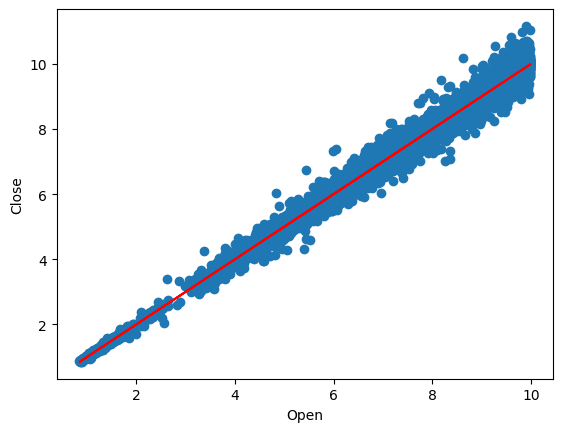

In [36]:
plt.scatter(cheap['open'], cheap['close'])
plt.xlabel('Open')
plt.ylabel('Close')
plt.plot(cheap['open'], a * cheap['open'] + b, color='red')  # Line of best fit
plt.show()

In [37]:
differences = cheap['close'] - (a * cheap['open'] + b)
differences.describe()

count    1.386300e+04
mean    -1.120221e-14
std      1.803464e-01
min     -1.272375e+00
25%     -8.305774e-02
50%     -1.831860e-03
75%      8.689877e-02
max      1.557503e+00
dtype: float64

In [52]:
test = df2.drop(['date', 'symbol'], axis=1)
test.corr()

,open,close,low,high,volume,Daily Return
open,1.000000,0.999849,0.999916,0.999930,-0.059950,-0.012952
close,0.999849,1.000000,0.999928,0.999927,-0.060154,0.004453
low,0.999916,0.999928,1.000000,0.999892,-0.060760,-0.003517
high,0.999930,0.999927,0.999892,1.000000,-0.059452,-0.004404
volume,-0.059950,-0.060154,-0.060760,-0.059452,1.000000,-0.011438
Daily Return,-0.012952,0.004453,-0.003517,-0.004404,-0.011438,1.000000


Daily Return = (Close - Open) / Open

In [44]:
df2

,date,symbol,open,close,low,high,volume,Daily Return
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0,2.409996
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0,-5.259995
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0,-1.430000
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0,1.140000
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0,-2.040001
...,...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0,-0.110001
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0,-0.029999
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0,-0.110000
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0,0.720001
